# Gaussian Blur
Blurring an image can be done by reducing the level of noise in the image by applying a filter to an image. Image blurring is one of the important aspects of image processing.

The ImageFilter class in the Pillow library provides several standard image filters. Image filters can be applied to an image by calling the filter() method of Image object with required filter type as defined in the ImageFilter class.

This filter also uses parameter radius and does the same work as box blur with some algorithmic changes. In short, changing the radius value, will generate different intensity of ‘Gaussianblur’ images.

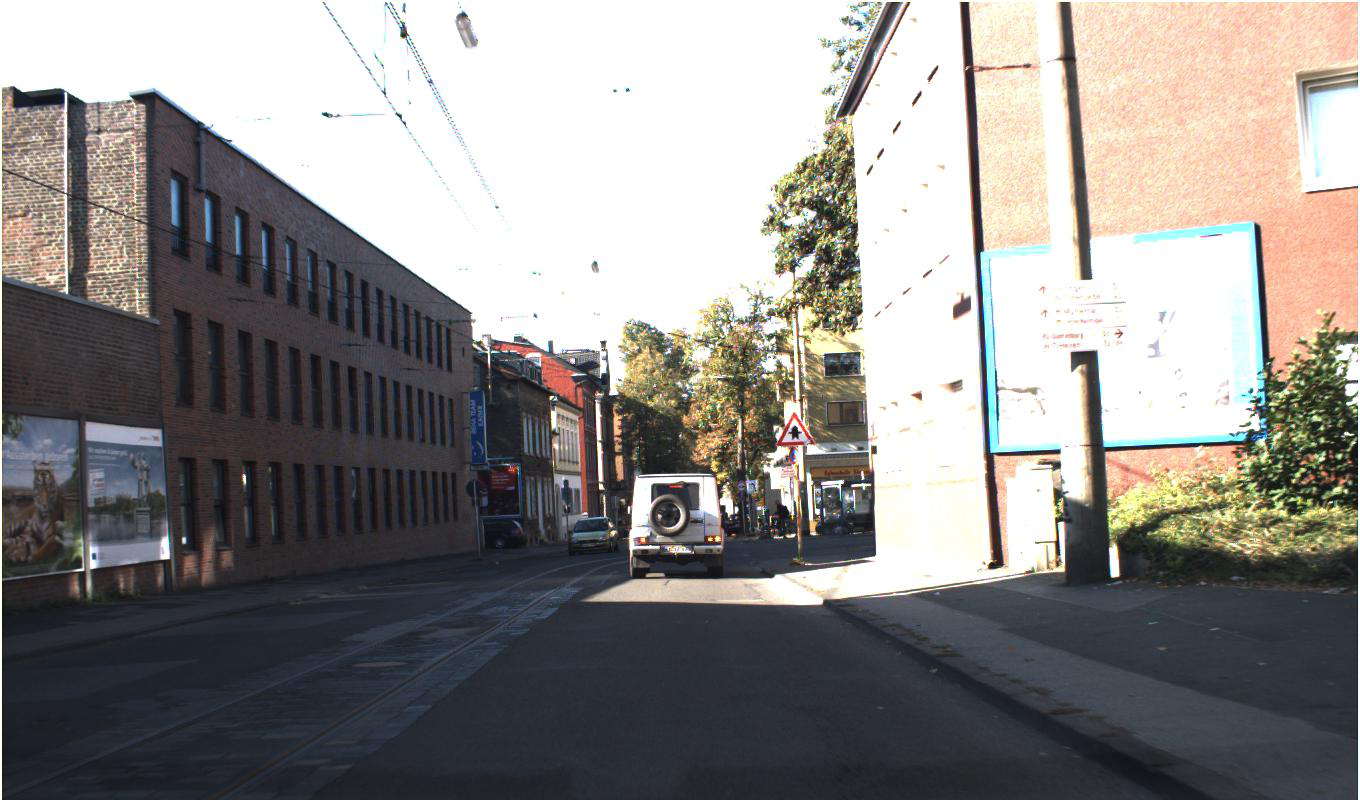

In [1]:
from PIL import Image, ImageFilter

origImage = Image.open("../data/datasets/gtsdb/train/images/00000.jpg")
display(origImage)

Blurring the image, radius is proportional to the intensity of the blur that is applied.

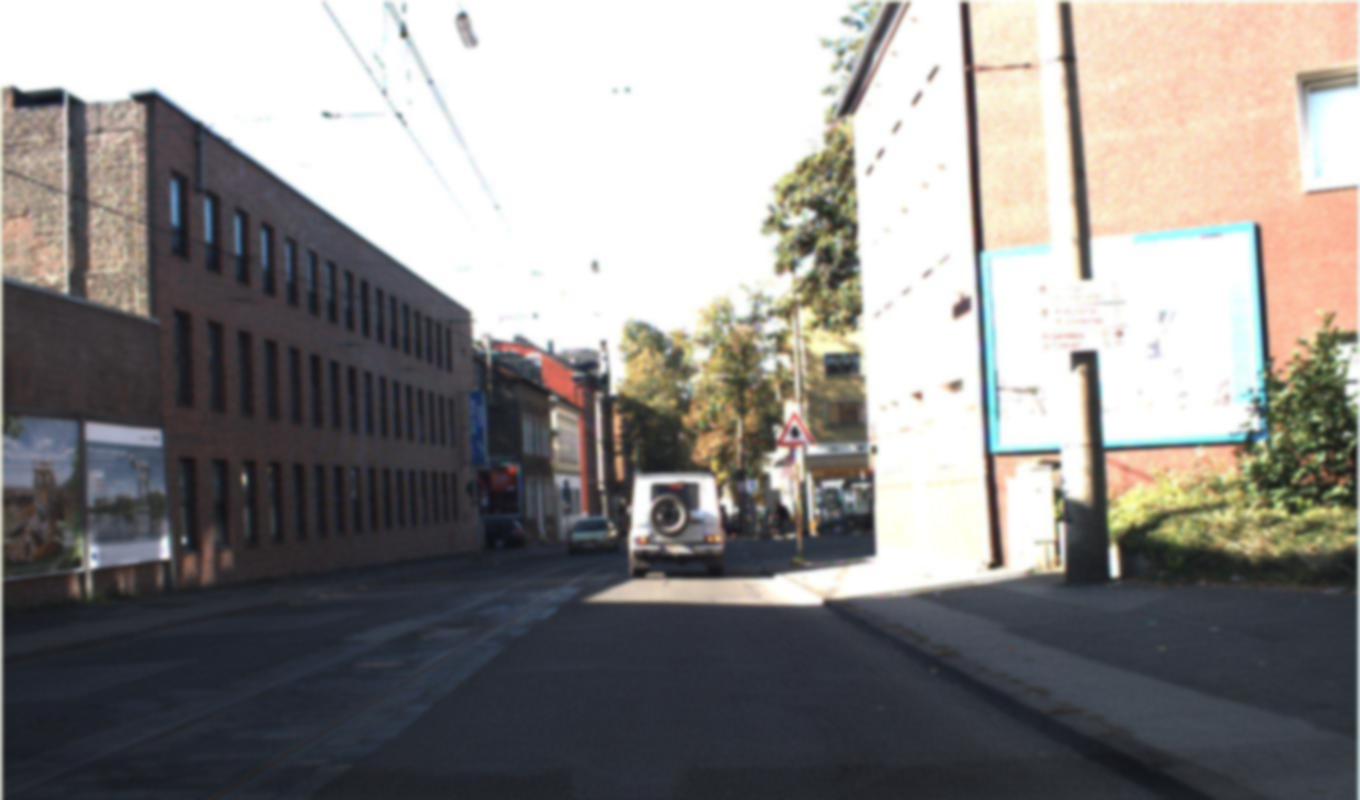

In [2]:
gauss_Image = origImage.filter(ImageFilter.GaussianBlur(radius=2))
display(gauss_Image)

# Noise
## Gaussian noise
Image noise is a random variation in the intensity values. Thus, by randomly inserting some values in an image, we can reproduce any noise pattern.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mimage
import cv2

Try loading an image with different APIs, as I experienced Problems with displaying images in Pycharm. In VS Code, as shown below, it works as expected.

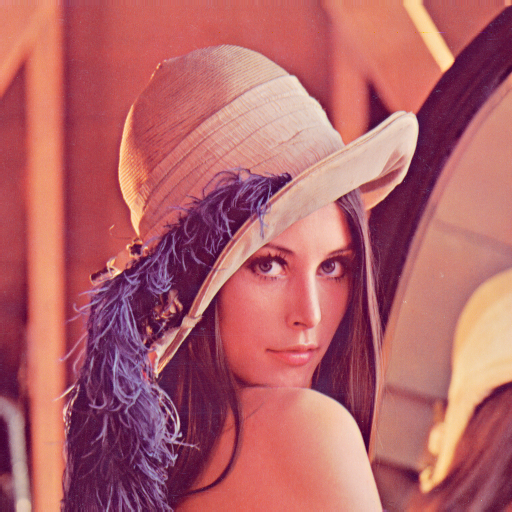

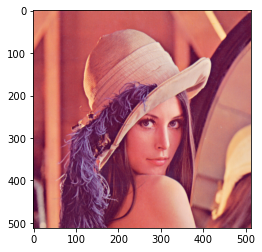

In [4]:
lenna = Image.open("../Lenna_(test_image).png")
display(lenna)
im_array = np.array(lenna)
plt.imshow(lenna)

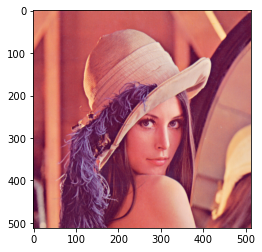

In [5]:
lenna_mimage = mimage.imread("../Lenna_(test_image).png")
plt.imshow(lenna_mimage)

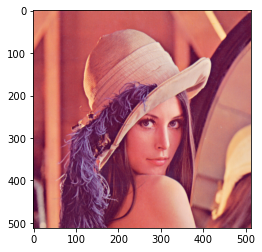

In [6]:
cv_image = cv2.imread("../Lenna_(test_image).png")
RGB_im = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_im)

In [7]:
print(im_array.shape)
print(im_array)

(512, 512, 3)
[[[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 ...

 [[ 84  18  60]
  [ 84  18  60]
  [ 92  27  58]
  ...
  [173  73  84]
  [172  68  76]
  [177  62  79]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]]


In [8]:
gauss = np.random.normal(0,1,cv_image.size)
gauss = gauss.reshape(cv_image.shape[0],cv_image.shape[1],cv_image.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(cv_image,gauss)

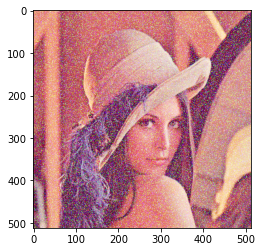

In [9]:
RGB_gaussian_noise_im = cv2.cvtColor(img_gauss, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_gaussian_noise_im)

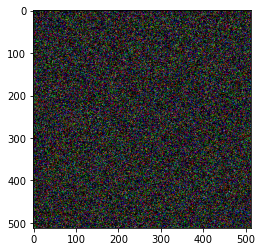

In [10]:
plt.imshow(gauss)

## Salt and Pepper Noise
Salt-and-pepper noise is  a sparsely occurring  white and  black pixels sometimes  seen on images. The Salt & Pepper  noise is generally  caused by  defect of  camera sensor,  software failure,  or hardware failure  in  image  capturing  or  transmission. Due  to  this  situation,  Salt  & Pepper  noise  model,  only  a 
proportion of all the image pixels are corrupted whereas other pixels are non-noisy [12]. A standard Salt & 
Pepper noise value may be either minimum (0) or maximum (255). The typical intensity value for pepper 
noise is close to 0 and for salt noise is close to 255. Furthermore, the unaffected pixels remain unchanged. 

\begin{equation}
    \eta(x,y) = 
    \begin{cases}
        0, \text{Pepper noise} \\
        255, \text{Salt noise}
    \end{cases}
\end{equation}
Source: [researchgate - Salt and Pepper Noise Effects and Removal](https://www.researchgate.net/publication/326408527_Salt_and_Pepper_Noise_Effects_and_Removal)

In [18]:
pixel = (
    np.random.randint(0, 10),
    np.random.randint(0, 10)
    )
pixel

(3, 2)

In [26]:
def draw_pixel(already_perturbed_pixels, rows, cols):
    new_Pixel = False
    while(not new_Pixel):
        pixel = (
            np.random.randint(0, rows),
            np.random.randint(0, cols)
            )
        if pixel not in already_perturbed_pixels: new_Pixel = True
    return pixel

# frac: Der Anteil der Pixel der gestört werden soll; image: Numpy Array of shape (row, col, 3)
def add_salt_and_pepper(frac, image):
    row, col, _ = image.shape
    already_perturbed_pixels = set()
    for i in range(int(row * col * frac)):
        pixel = draw_pixel(already_perturbed_pixels=already_perturbed_pixels, rows=row, cols=col)
        already_perturbed_pixels.add(pixel)
        image[pixel[0], pixel[1]] = [255,255,255] if(np.random.randint(0,2)) else [0,0,0]
    return image

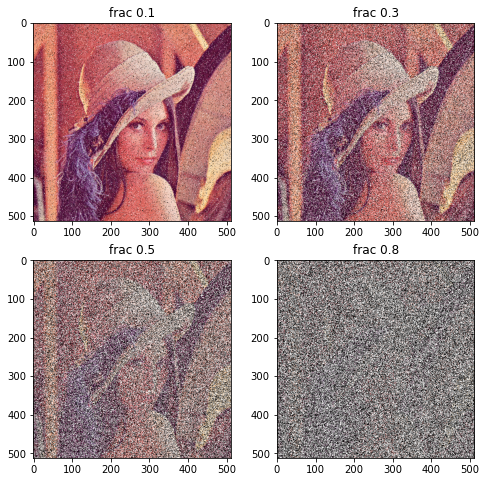

In [32]:
image = cv2.imread("../Lenna_(test_image).png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(2,2, figsize=(8, 8))
axs[0,0].imshow(add_salt_and_pepper(frac=0.1, image=image))
axs[0,0].set_title("frac 0.1")
axs[0,1].imshow(add_salt_and_pepper(frac=0.3, image=image))
axs[0,1].set_title("frac 0.3")
axs[1,0].imshow(add_salt_and_pepper(frac=0.5, image=image))
axs[1,0].set_title("frac 0.5")
axs[1,1].imshow(add_salt_and_pepper(frac=0.8, image=image))
axs[1,1].set_title("frac 0.8")
plt.show()

# Aufhellen & Abdunkeln

# Abdecken von Teilen des Bildes